https://drive.google.com/file/d/15HMoVhswYFFDhMkFOf7fiIVe121PNkfN/view?usp=sharing

# Загрузка данных и отображение

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('clust06.csv')
ds = StandardScaler().fit_transform(df)

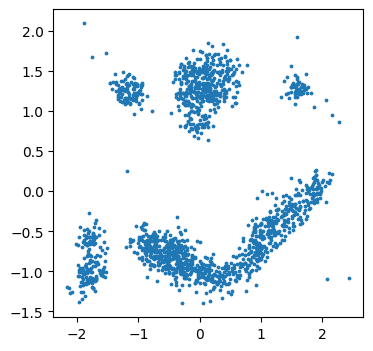

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(ds[:,0], ds[:,1], s=3)
plt.show()

Контроль выбросов

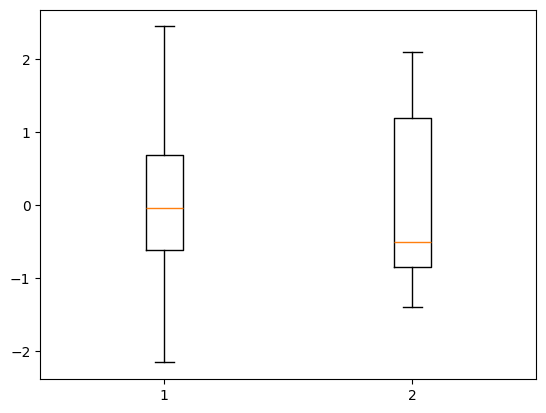

In [ ]:
plt.boxplot(ds);

# Кластеризация

In [ ]:
# количество кластеров
clusters = 4

## Функции

In [ ]:
from collections import Counter

def plot_clusters():
  all_clusters = np.unique(labels)
  plt.figure(figsize=(4,4))
  for cluster in all_clusters:
    row = np.where(labels==cluster)
    plt.scatter(ds[row,0], ds[row,1], marker='x' if cluster<0 else 'o', s=10)
  plt.show()

def cluster_profiles():
  n_features = ds.shape[1] # число пизнаков
  n_clusters = np.unique(labels).size
  plt.figure(figsize=(6,6))

  for i in range(n_features):
    plt.subplot(2,2,i+1)
    cl_dict = {}
    for j in range(n_clusters):
      row = np.where(labels==j)
      cl_dict[j] = df.to_numpy()[row,i].flatten()


    plt.boxplot(cl_dict.values(), cl_dict.keys())
    plt.title(f'Признак {df.columns[i]}')
    plt.xlabel(f'Кластеры')
  plt.tight_layout()
  plt.show;

def cluster_barplot():
  keys = Counter(labels).keys()
  values = Counter(labels).values()
  plt.bar(keys, values)
  plt.show()

def cluster_sizes():
  print(Counter(labels).values())

## K-means

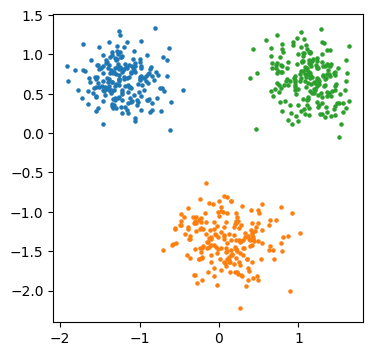

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=clusters)
labels=model.fit_predict(ds)
plot_clusters()

<ipython-input-293-4b07d28b7bf6>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())
<ipython-input-293-4b07d28b7bf6>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())


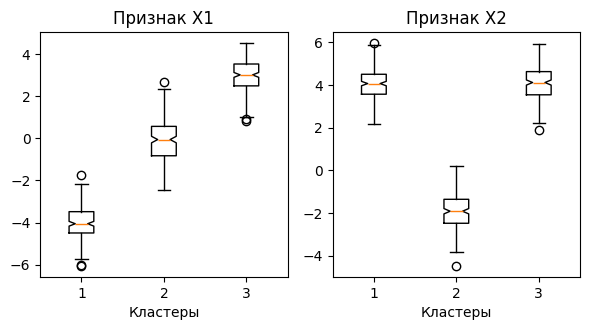

In [ ]:
cluster_profiles()

## Expectation-Maximization / Gaussian Mixture Model

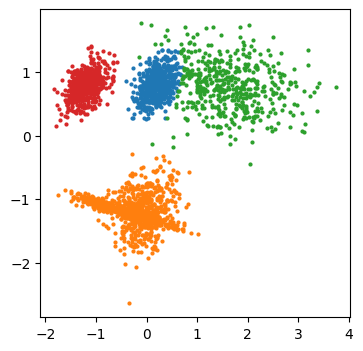

In [ ]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=clusters, n_init=10)
labels = model.fit_predict(ds)
plot_clusters()

<ipython-input-101-c9c732d25870>:14: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())
<ipython-input-101-c9c732d25870>:14: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())


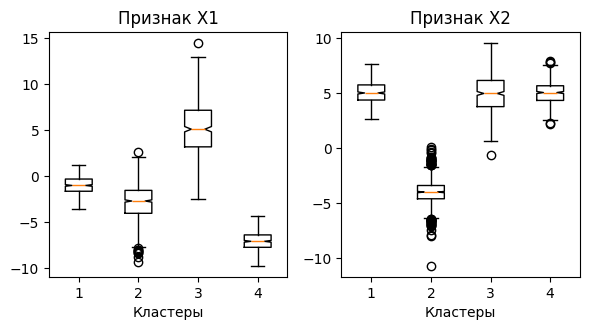

In [ ]:
cluster_profiles()

## Иерархическая кластеризация / AgglomerativeClustering

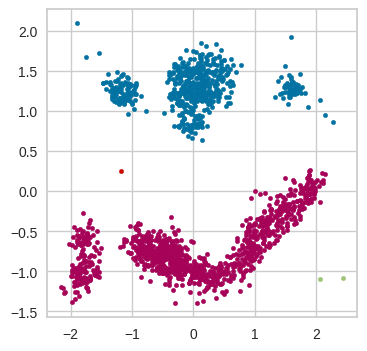

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering (n_clusters=clusters, linkage="single")
labels = model.fit_predict(ds)
plot_clusters()

<ipython-input-310-e5521537281c>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())
<ipython-input-310-e5521537281c>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())


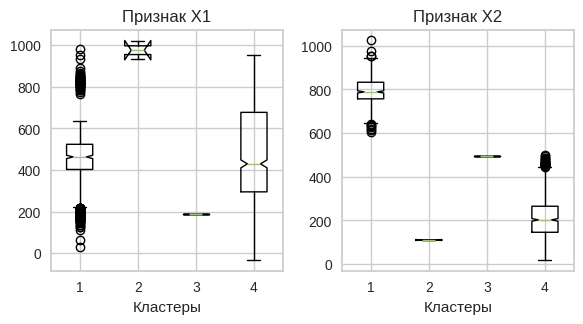

In [ ]:
cluster_profiles()

dict_values([1000, 557, 2, 1])


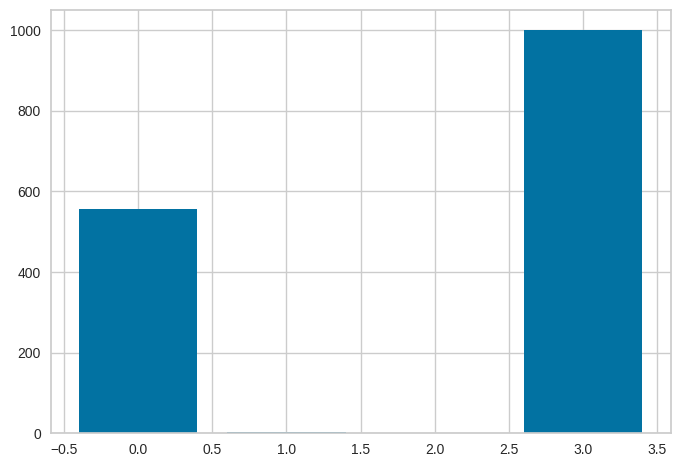

In [ ]:
cluster_sizes()
cluster_barplot()

## Афинное распространение / Affinity propagation

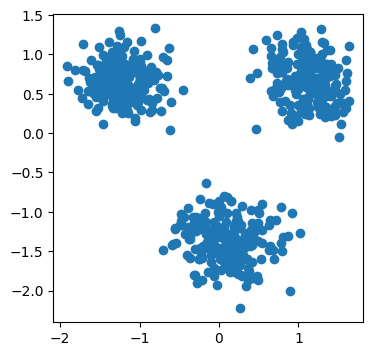

In [ ]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.9585502215365331)
labels = model.fit_predict(ds)
plot_clusters()

## DBSCAN

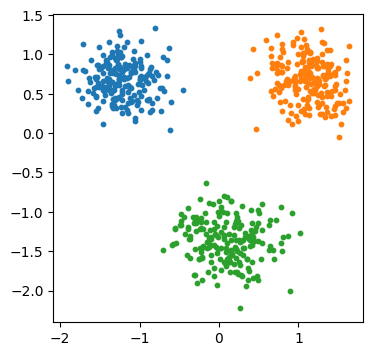

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(min_samples=5, eps=0.5)
labels = model.fit_predict(ds)
plot_clusters()

<ipython-input-310-e5521537281c>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())
<ipython-input-310-e5521537281c>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())


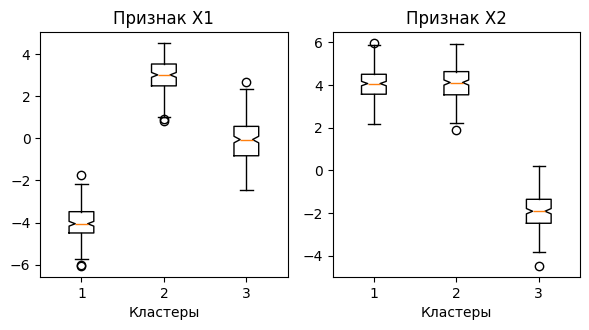

In [ ]:
cluster_profiles()

dict_values([200, 200, 200])


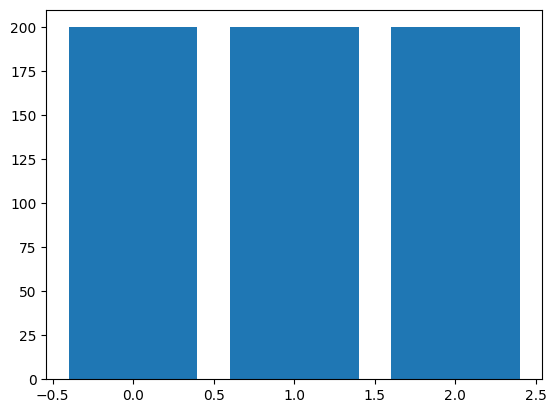

In [ ]:
cluster_sizes()
cluster_barplot()

## OPTICS

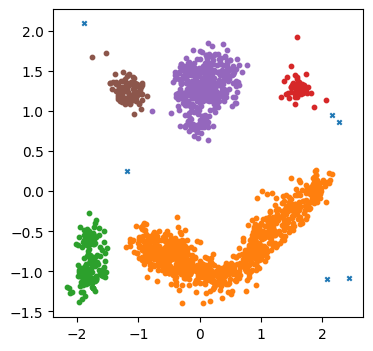

In [ ]:
from sklearn.cluster import OPTICS

model = OPTICS(min_samples=40)
labels = model.fit_predict(ds)
plot_clusters()

<ipython-input-310-e5521537281c>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())
<ipython-input-310-e5521537281c>:24: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(cl_dict.values(), cl_dict.keys())


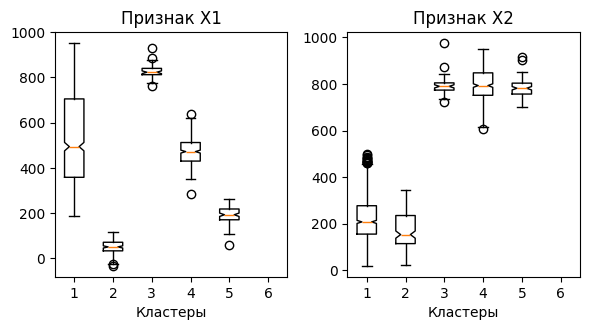

In [ ]:
cluster_profiles()

dict_values([850, 401, 150, 101, 52, 6])


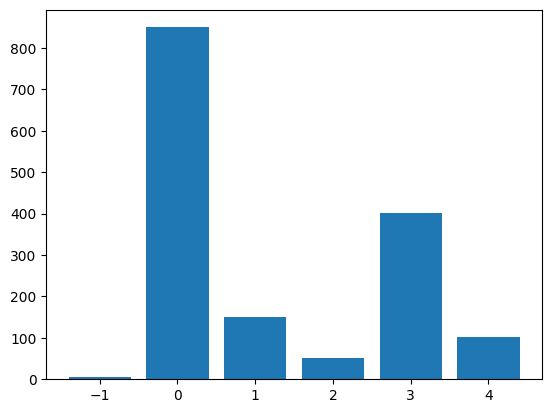

In [ ]:
cluster_sizes()
cluster_barplot()

# Число кластеров

## Elbow method (метод локтя)

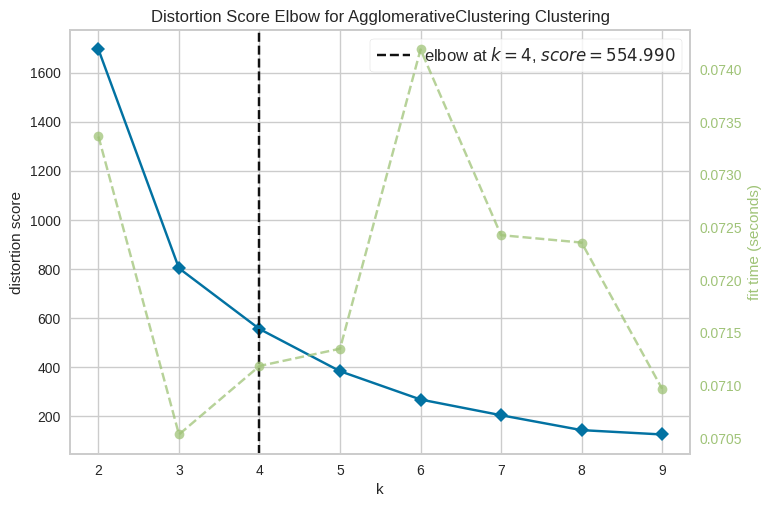

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(AgglomerativeClustering(), k=(2,10))
model.fit(ds)
model.show()

## Silhouette score

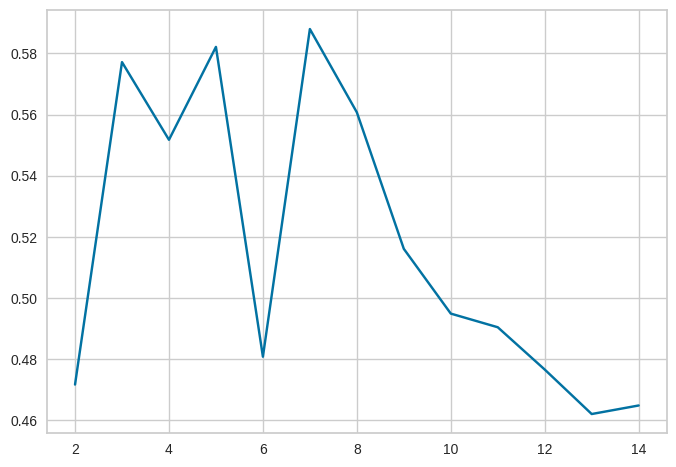

In [ ]:
from sklearn.metrics import silhouette_score

clusters = []
scores = []
for cluster in range(2, 15):
  model = KMeans(n_clusters=cluster)
  labels = model.fit_predict(ds)
  clusters.append(cluster)
  scores.append(silhouette_score(ds, labels))

plt.plot(clusters, scores)
plt.show()